<a href="https://colab.research.google.com/github/jhbeann/Bigdata_R/blob/main/Chapter3_section3_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 - 회귀 (예측)
#### 분류: 예측값 이산형 // 회귀: 예측값 연속형
- 독립변수 개수 1개: 단일 회귀/여러개: 다중회귀
- 선형/비선형 회귀
- 로지스틱 회귀
- 의사결정나무(회귀)

**목표** - 잔차의 합이 최소가 되는 최적의 회귀 계수 찾기

> 잔차 : 실제값과 회귀모델의 예측값 차이

최소제곱법(최소자승법) : 잔차 제곱의 합을 최소로 하기. 그 모델 찾기




UCI 자동차 연비 데이터셋 사용
--> 자동차 연비를 예측하는 선형 회귀모델 구성



In [77]:
library(dplyr)
library(ggplot2)

In [78]:
df <- read.csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv", stringsAsFactors=TRUE)

In [79]:
head(df,3)
# mpg : 연비(종속변수)
str(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,18,8,307,130,3504,12.0,70
2,15,8,350,165,3693,11.5,70
3,18,8,318,150,3436,11.0,70


'data.frame':	398 obs. of  7 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...


In [80]:
summary(df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 92.0   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.2   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:125.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :2                     
  acceleration     model.year   
 Min.   : 8.00   Min.   :70.00  
 1st Qu.:13.82   1st Qu.:73.00  
 Median :15.50   Median :76.00  
 Mean   :15.57   Mean   :76.01  
 3rd Qu.:17.18   3rd Qu.:79.00  
 Max.   :24.80   Max.   :82.00  
                                

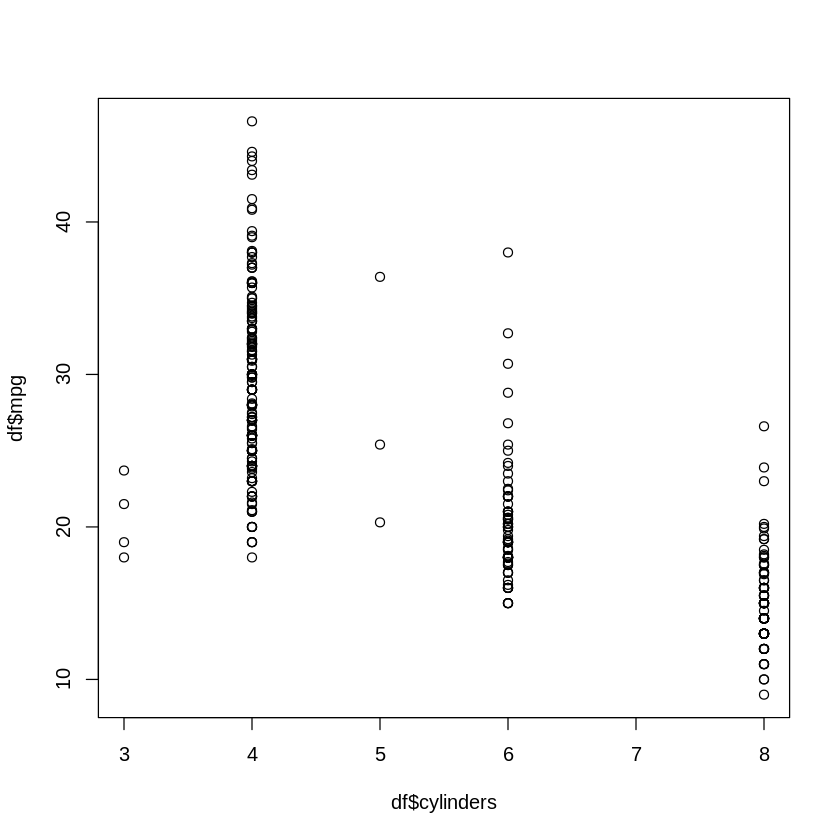

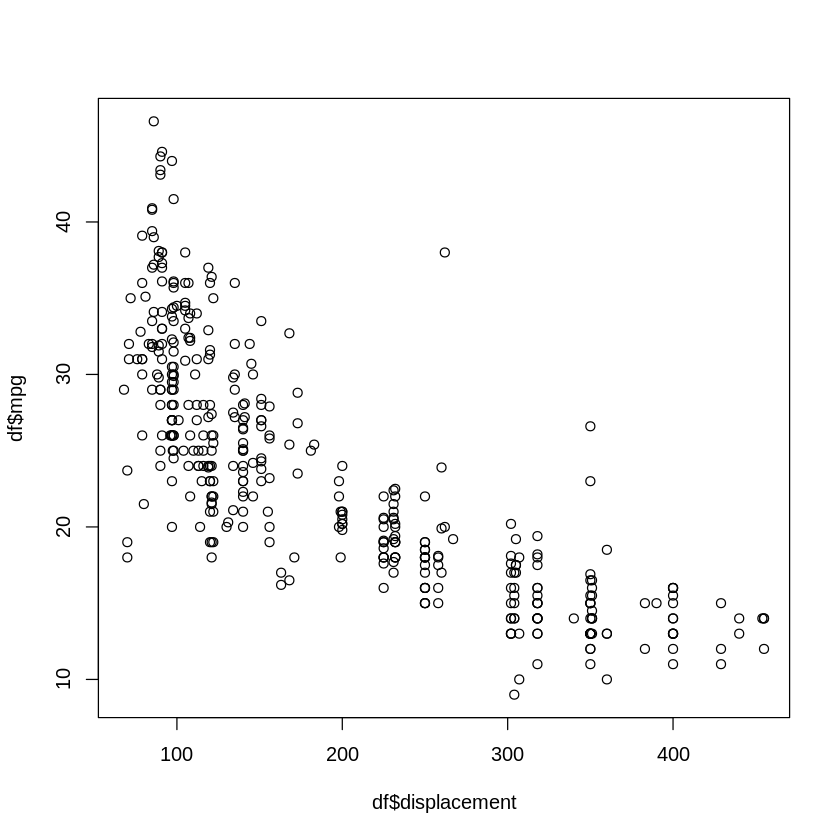

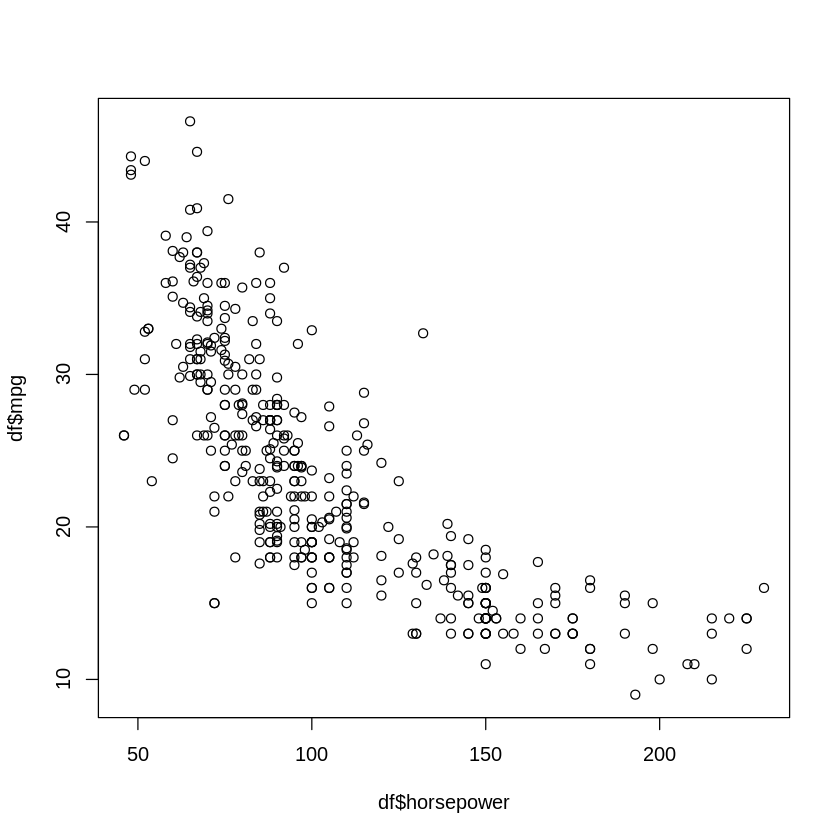

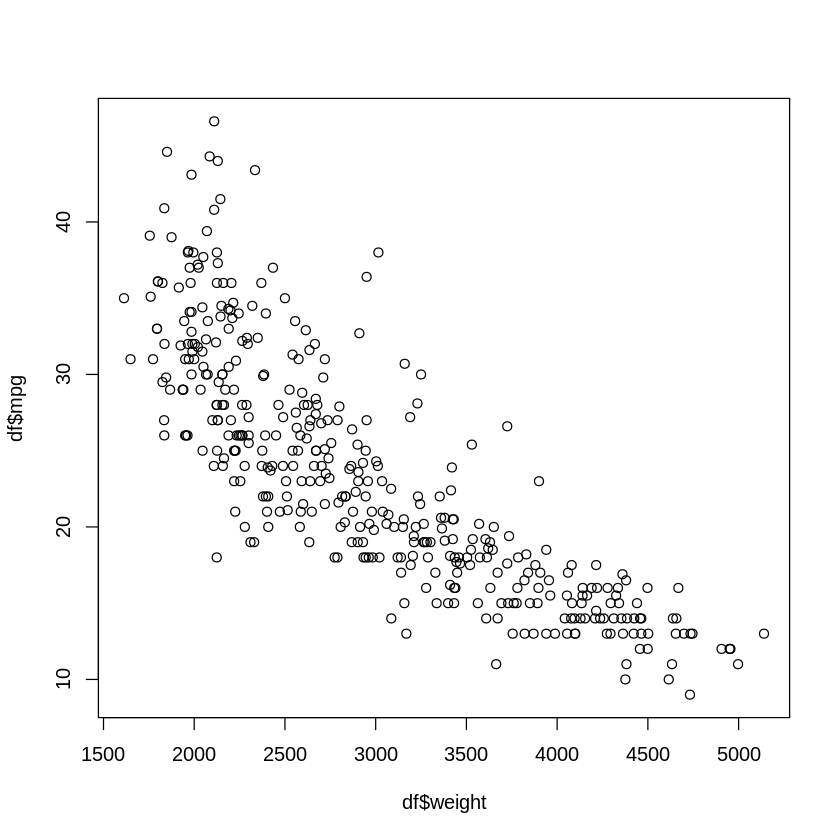

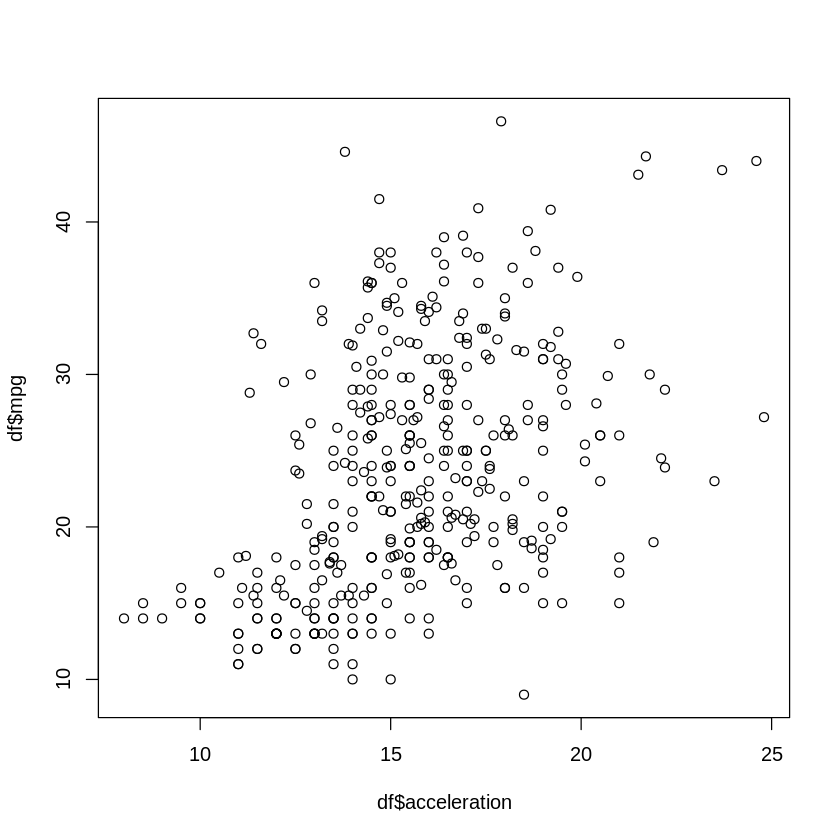

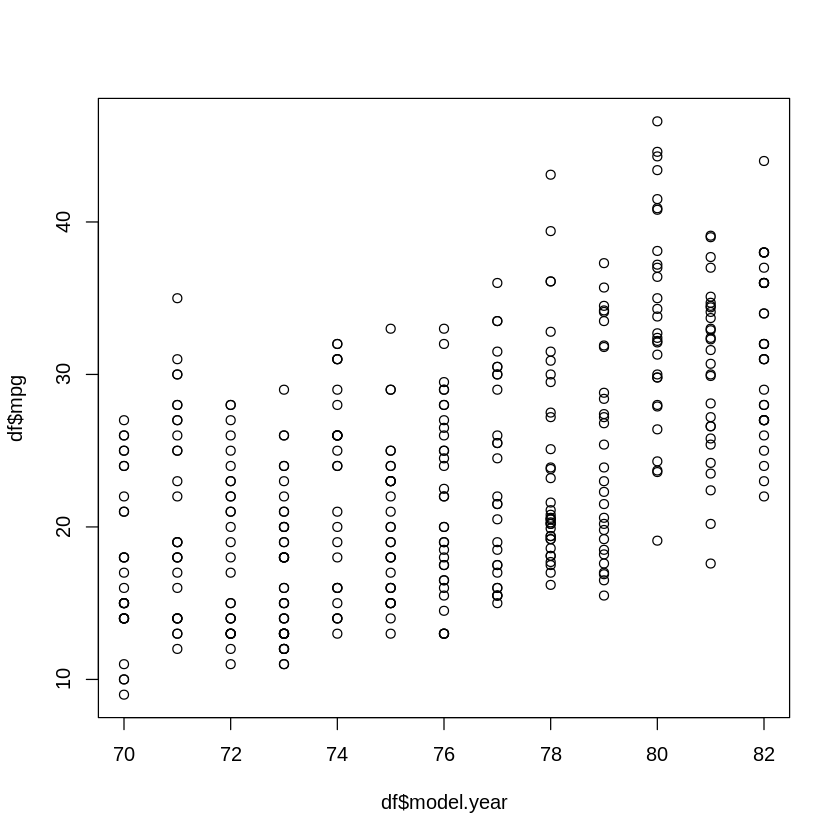

In [81]:
# 종속변수 mpg(연비)와 다른 변수들 간 상관관계 분석

plot(df$cylinders, df$mpg) # 엔진의 실린더 수 & 연비
plot(df$displacement, df$mpg) # 엔진배기량
plot(df$horsepower, df$mpg)
plot(df$weight, df$mpg)
plot(df$acceleration, df$mpg)
plot(df$model.year, df$mpg)

- plot 으로 상관관계 분석 결과 horsepower 와 weight 에 음의 상관관계 존재


--> 이 두 변수에 대해 선형회귀 모델 만들기


In [82]:
# 전처리 하기
df <- df %>%filter(!is.na(horsepower))


In [83]:
# 종속변수 : mpg, 독립변수 : weight
model <- lm(mpg~weight, df)
summary(model)


Call:
lm(formula = mpg ~ weight, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0511  -2.7526  -0.3575   2.1207  16.4411 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.3975475  0.7969105   58.22   <2e-16 ***
weight      -0.0076961  0.0002578  -29.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.343 on 394 degrees of freedom
Multiple R-squared:  0.6934,	Adjusted R-squared:  0.6927 
F-statistic: 891.2 on 1 and 394 DF,  p-value: < 2.2e-16


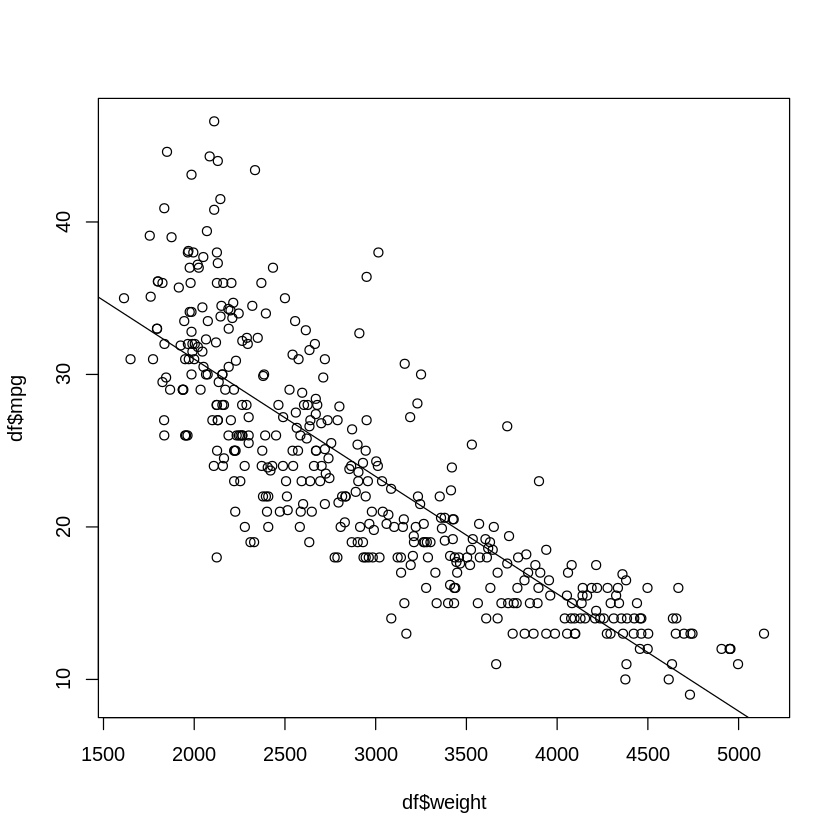

In [84]:
plot(df$weight,df$mpg)
abline(coef(model))

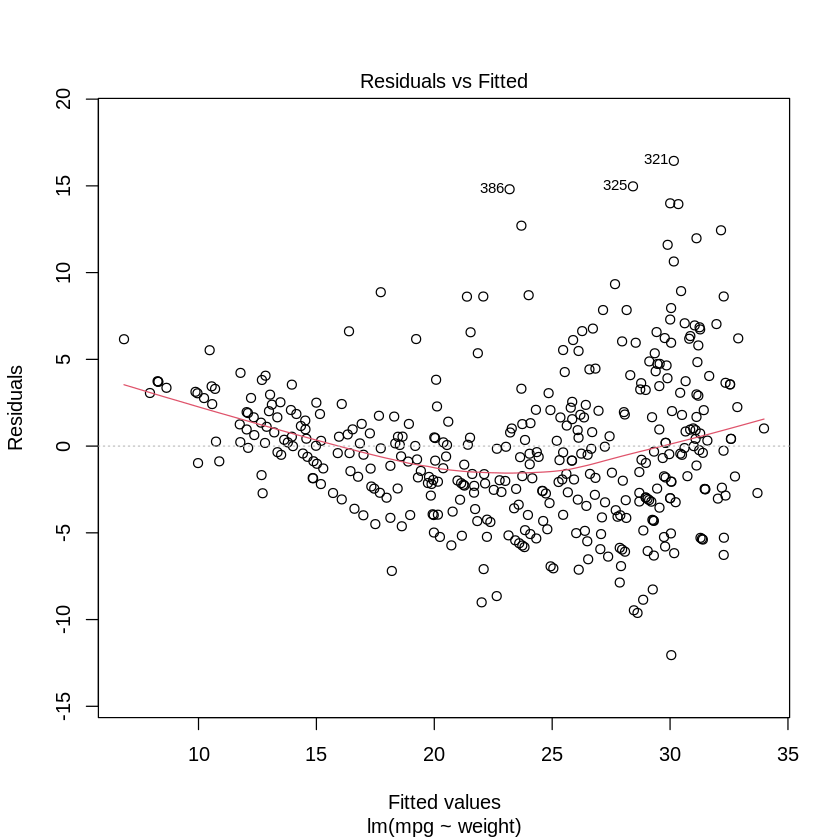

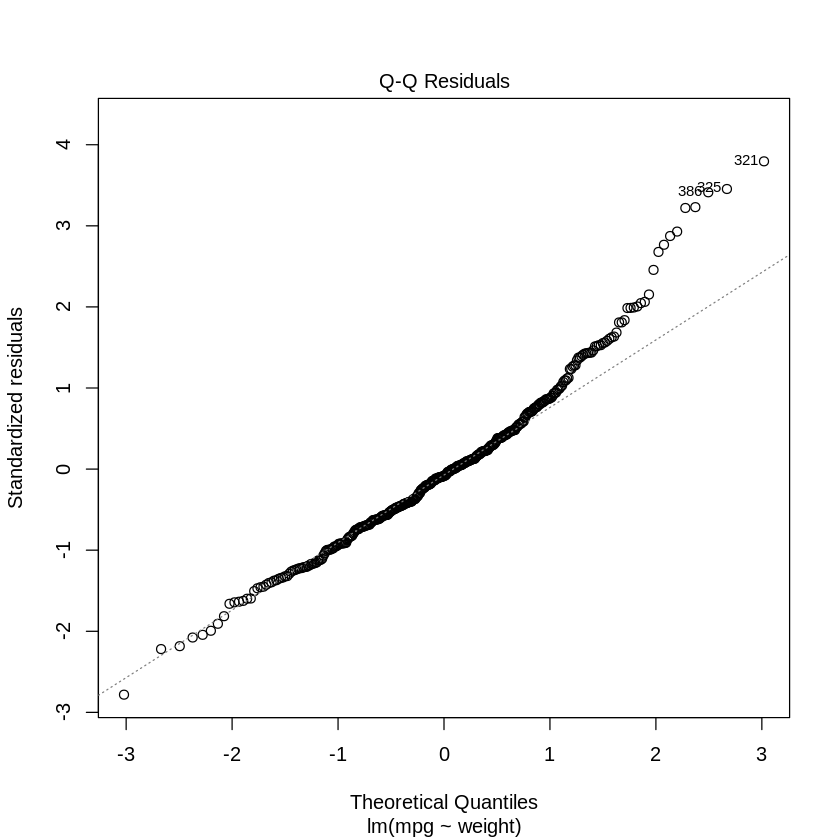

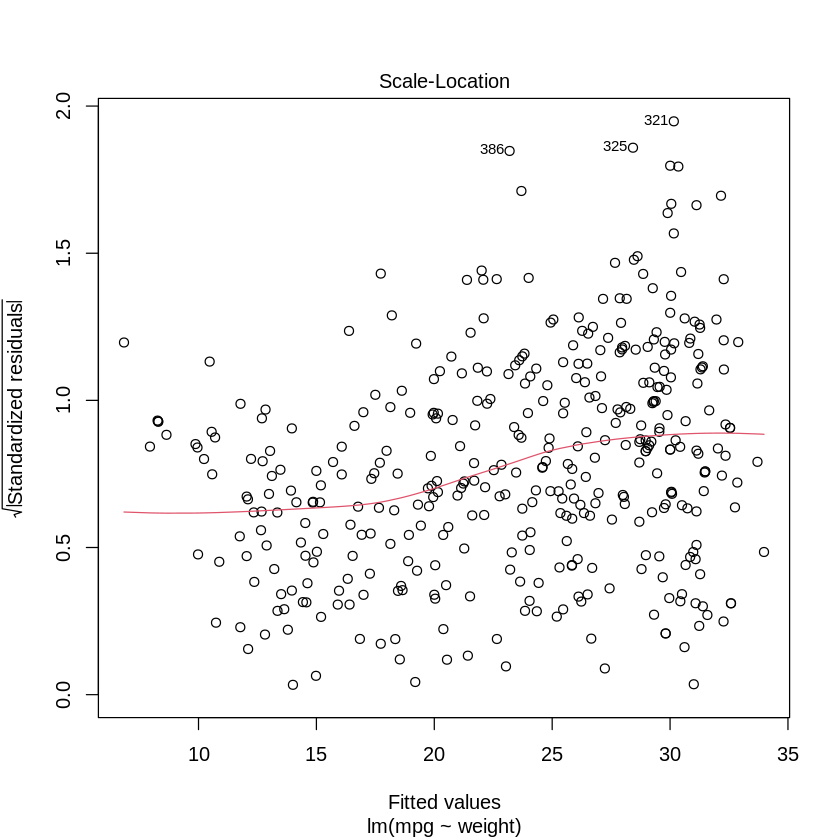

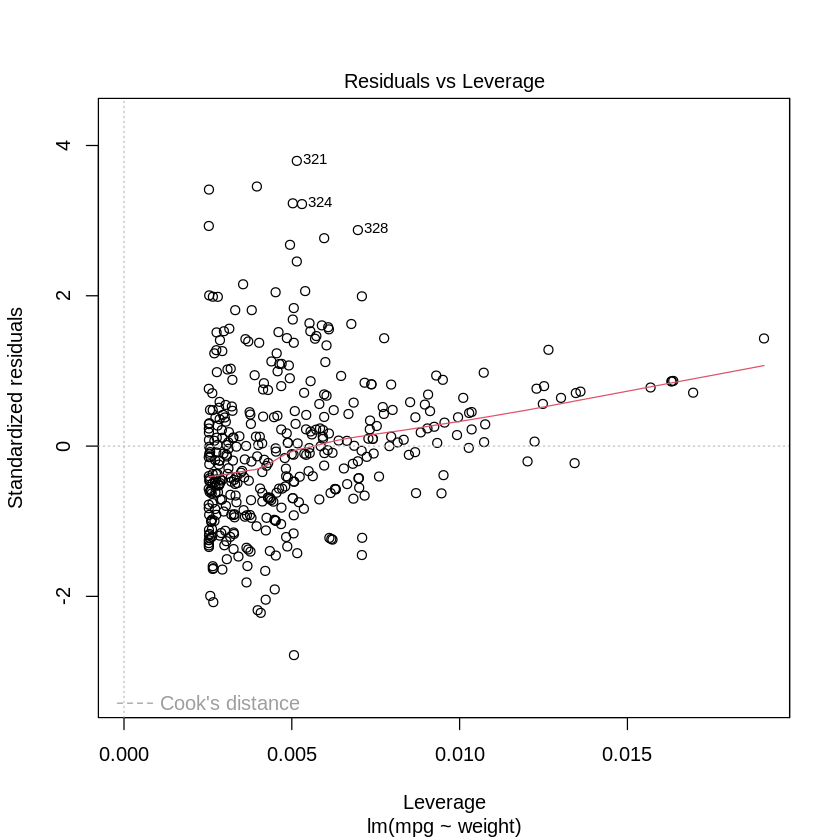

In [85]:
plot(model)

In [86]:
predict.lm(model, newdata = data.frame(weight=2740),interval = "none")

1 
25.31035

In [87]:
predict.lm(model, newdata = data.frame(weight = 2740), interval = "confidence")

,fit,lwr,upr
1,25.31035,24.8653,25.7554


구간추정2- 회귀계수의 불확실성과 오차항 감안한 구간추정
interval="prediction"

-> 예측값과 함께 95% 확률로 구간 추정

-> 생성된 모델은 weight = 2740인 경우, mpg를 25.31035(fit)로 예측 16.76~33.86(lwr~upr) 사이에 mpg 값이 존재할 확률 95%

In [88]:
predict.lm(model, newdata = data.frame(weight = 2740), interval = "prediction")

,fit,lwr,upr
1,25.31035,16.75984,33.86086


In [89]:
cor(df,method = "pearson")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year
mpg,1.0000000,-0.7756799,-0.8047109,-0.7775745,-0.8327248,0.4211591,0.5811444
cylinders,-0.7756799,1.0000000,0.9507055,0.8437513,0.8960576,-0.5048442,-0.3525539
displacement,-0.8047109,0.9507055,1.0000000,0.8977872,0.9327289,-0.5427133,-0.3746199
horsepower,-0.7775745,0.8437513,0.8977872,1.0000000,0.8643499,-0.6872409,-0.4206968
weight,-0.8327248,0.8960576,0.9327289,0.8643499,1.0000000,-0.4154623,-0.3117738
acceleration,0.4211591,-0.5048442,-0.5427133,-0.6872409,-0.4154623,1.0000000,0.2945883
model.year,0.5811444,-0.3525539,-0.3746199,-0.4206968,-0.3117738,0.2945883,1.0000000


### 2. 다중 선형회귀분석 이용한 예측 문제 해결

In [90]:
library(ggplot2)
library(dplyr)

데이터셋: 미국 캘리포니아 인구가구 통계 데이터셋.
주택중위가치(median_house_value)에 영향을 주는 변수 찾기
--> 다중 선형 회귀모델 생성.

(종속변수: median_house_value)

상관성이 있다고 판단되는 변수를 선택 후 다중 선형 회귀 알고리즘 적용하여 모델 생성.


In [91]:
df = read.csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv", stringsAsFactors=TRUE)
head(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [92]:
str(df)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...


In [93]:
summary(df)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [94]:
# 결측치 없는 데이터 추출
df<-df %>% filter(!is.na(total_bedrooms))

# 결측치가 있는 컬럼을 어떻게 알까..?


# ocean_proximity 범주형 분석에서 제외
df<- df %>% select(-ocean_proximity)

In [95]:
cor(df,method = "pearson")
# 결과: median_income 을 제외하면 종속변수와 상관성이 낮다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92461611,-0.10935655,0.04548017,0.06960802,0.100270301,0.05651277,-0.015550150,-0.04539822
latitude,-0.92461611,1.00000000,0.01189907,-0.03666681,-0.06698283,-0.108997344,-0.07177419,-0.079626319,-0.14463821
housing_median_age,-0.10935655,0.01189907,1.00000000,-0.36062830,-0.32045104,-0.295787297,-0.30276797,-0.118277723,0.10643205
total_rooms,0.04548017,-0.03666681,-0.36062830,1.00000000,0.93037950,0.857281251,0.91899153,0.197881519,0.13329413
total_bedrooms,0.06960802,-0.06698283,-0.32045104,0.93037950,1.00000000,0.877746743,0.97972827,-0.007722850,0.04968618
population,0.10027030,-0.10899734,-0.29578730,0.85728125,0.87774674,1.000000000,0.90718590,0.005086624,-0.02529973
households,0.05651277,-0.07177419,-0.30276797,0.91899153,0.97972827,0.907185900,1.00000000,0.013433892,0.06489355
median_income,-0.01555015,-0.07962632,-0.11827772,0.19788152,-0.00772285,0.005086624,0.01343389,1.000000000,0.68835548
median_house_value,-0.04539822,-0.14463821,0.10643205,0.13329413,0.04968618,-0.025299732,0.06489355,0.688355475,1.00000000


In [96]:
# 선형회귀분석 lm
# lm() 함수에 학습용 데이터  df  종속변수~독립변수 입력해 호출하면 학습이 수
model<-lm(median_house_value~.,df)
summary(model)


Call:
lm(formula = median_house_value ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-563557  -43632  -11367   30340  801274 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.585e+06  6.290e+04 -57.001  < 2e-16 ***
longitude          -4.273e+04  7.171e+02 -59.588  < 2e-16 ***
latitude           -4.251e+04  6.770e+02 -62.796  < 2e-16 ***
housing_median_age  1.158e+03  4.339e+01  26.687  < 2e-16 ***
total_rooms        -8.250e+00  7.943e-01 -10.387  < 2e-16 ***
total_bedrooms      1.138e+02  6.931e+00  16.423  < 2e-16 ***
population         -3.839e+01  1.084e+00 -35.407  < 2e-16 ***
households          4.770e+01  7.547e+00   6.321 2.65e-10 ***
median_income       4.030e+04  3.372e+02 119.504  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69570 on 20424 degrees of freedom
Multiple R-squared:  0.6369,	Adjusted R-squared:  0.6368 
F-statistic:  4478 on 8 and 204

--> 회귀계수와 y 절편에 대한 p-value 가 모두 유의수준 0.05보다 작다

--> 통계적으로 유의하다
+ adjusted R square :0.64 로 회귀모델이 현 데이터 64% 설명을 의미


 predict.lm()::생성된 선형회귀모델에 대해서 새로운 데이터에 대한 예측


In [97]:
# 기존 데이터셋의 10번째 데이터에 대한 예측 결과 보기
print(df[10,])
predict.lm(model, newdata=df[10,],interval="none")

# 264465로 실제 261100와 유사한 값으로 예측한 것이다.

   longitude latitude housing_median_age total_rooms total_bedrooms population
10   -122.25    37.84                 52        3549            707       1551
   households median_income median_house_value
10        714        3.6912             261100


10 
264465.8

### 3. 의사결정나무를 이용한 예측 문제 해결
- 어떠한 값 자체를 예측하는 것. 최종적으로 회귀나무를 구축하는 과정
- 상관성 있는 변수를 선택, 각각 의사결정나무 알고리즘을 적용하여 모델 생성
- 평균제곱오차(MSE)으로 모델 성능 평가 -> 학습, 테스트 데이터셋에 모두 평가

MSE
  - 오차의 제곱에 대한 평균
  - 예측값에 대한 정확성 측정하는 방법
  - 값이 작을수록 정확성이 높다

In [98]:
library(dplyr)
library(ggplot2)

# 의사결정나무 모델 위한 패키지 임포트
install.packages("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [99]:
df = read.csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv", stringsAsFactors=TRUE)

In [100]:
head(df,3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY


In [101]:
str(df)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...


In [102]:
summary(df)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [103]:
# 전처리
df<- df %>% filter(!is.na(total_bedrooms))

df<- df %>% select(-ocean_proximity)

In [104]:
cor(df, method = "pearson")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92461611,-0.10935655,0.04548017,0.06960802,0.100270301,0.05651277,-0.015550150,-0.04539822
latitude,-0.92461611,1.00000000,0.01189907,-0.03666681,-0.06698283,-0.108997344,-0.07177419,-0.079626319,-0.14463821
housing_median_age,-0.10935655,0.01189907,1.00000000,-0.36062830,-0.32045104,-0.295787297,-0.30276797,-0.118277723,0.10643205
total_rooms,0.04548017,-0.03666681,-0.36062830,1.00000000,0.93037950,0.857281251,0.91899153,0.197881519,0.13329413
total_bedrooms,0.06960802,-0.06698283,-0.32045104,0.93037950,1.00000000,0.877746743,0.97972827,-0.007722850,0.04968618
population,0.10027030,-0.10899734,-0.29578730,0.85728125,0.87774674,1.000000000,0.90718590,0.005086624,-0.02529973
households,0.05651277,-0.07177419,-0.30276797,0.91899153,0.97972827,0.907185900,1.00000000,0.013433892,0.06489355
median_income,-0.01555015,-0.07962632,-0.11827772,0.19788152,-0.00772285,0.005086624,0.01343389,1.000000000,0.68835548
median_house_value,-0.04539822,-0.14463821,0.10643205,0.13329413,0.04968618,-0.025299732,0.06489355,0.688355475,1.00000000


In [105]:
# 의사결정나무 학습
model <- ctree(median_house_value~.,data = df)

In [106]:
summary(model)

    Length      Class       Mode 
         1 BinaryTree         S4 

In [107]:
# 학습된 모델 기반 예측
print(df[10,])

predict(model, data=df[10,],type = "node")

   longitude latitude housing_median_age total_rooms total_bedrooms population
10   -122.25    37.84                 52        3549            707       1551
   households median_income median_house_value
10        714        3.6912             261100


[1] 594 589 576 555 460 459 473 473  56 478 457 480 472 160  56  55 161  55
   [19]  55 161  55  55  56  55 161 129 129  55  56  55  55  56  55  55 162  55
   [37]  55  55 457 162  55  55  55 459 161 161  55  55  55  55  56  55  56  55
   [55]  55  55  55  55  55 129 457 567  55  55 129  55  55 160  55  56  55  55
   [73]  55  55 129  56 129  55  55  55  55  55  55  55  55 160  55  55  55  55
   [91]  55  55  55 129  56  56 129  55  56 129 129 288 444 162 129 465 470 470
  [109] 480 273 555 129 129 473 221 457 129 481 568 558 568 390 568 559 576 549
  [127] 576 568 576 564 576 584 576 576 588 588 565 594 576 565 565 576 568 162
  [145] 227 552 568 472 161 491 465 559 472 465 594 594 568 568 576 162  55 162
  [163] 473 480 129  56  55  56  56  56 161  55  56  56  55  55  55 129 161 161
  [181] 129  55  55  55 161  56 161  55  55  55 457  55  55  55 457  56  55 161
  [199] 160 160 161  56  56  55  56  55  55  56  55  55 444 478 457 138 138 138
  [217] 139 139 139 139 139 444 485 465 478 557 463 464 463 160 463 454 459 463
  [235] 139  55 138 138 138 138 138  55 161 139 138  55 138 137  56  56 161  55
  [253] 465 160 137  55  55  55  56  55 457 444 161 139  55 160 457 457 465 457
  [271] 189 552 459 463 552 576 450 139 160 555 565 529 575 526 446 139 444 457
  [289] 459 465 464 444 444 444  56  55  55  55 137  55 459  56  55 137  55  55
  [307]  56 472  55 161  55  56 137  55  55  55  56  55  56  55  55  55  55  55
  [325] 137  55 139 137  55 137 137  55 137  55  55 139  55  55 446  55  55  55
  [343]  55  55 137  55 137  55  55 137  56 444  55 464 137 564 390 534 504 565
  [361] 576 189 565 390 534 485 139 446 444 444 137 137 444 457  55 189  55 137
  [379] 450 444 465 137  55 457 555 457 229 457 129 355 129 465 463  56 478 459
  [397] 552 557 465 465 555 594 594 568 576 594 576 599 465 552 465 558 491 576
  [415] 558 594 568 568 568 576 568 568 558 492 457 129 490 465 459 460 472 129
  [433] 457  55  55  55 160 160 129  56 457 457  56 162 459 161 129 129  56  56
  [451] 129 465 162  56 552 129  56  55  55  56  56 129 162 459 457  55 129 129
  [469]  55 161 161  56  56  56 161 129 457 162  56 160 457 161  56  56 162 162
  [487] 473 129 576 465  56 594 598 559 480 162  55  55  55  55  55 160  55  56
  [505]  55 162 263 594 599 599 599 594 599 568 594 594 568 568 559 465 552 160
  [523] 457 457 162 457 457 465 457 160 161 459 446 498 129 129  55 161 288 508
  [541] 161 161 558 465 162 473 472 465 465 457 161 161 129 129 559 465 472 161
  [559] 555 460 425 162 472 465 438 384 572 291 473 292 438 190 572 572 417 558
  [577] 412 504 564 541 541 540 541 428 417 248 534 381 508 564 390 428 545 463
  [595] 390 276 133 272 133 132 229 291 132 444 132 263 428 473 465 465  55 465
  [613] 459 465 139 472 139 460 160 450 444 189 229 248 534 478 444 219 132 485
  [631] 390 189 217  56 132 444 133 465 139 450 576 588 224 189 529 444 132 444
  [649] 444 444 288 133 288 473 276 189 208 355 133 271 189 390 381 189 208 208
  [667] 189 132 381 208 132 390 498 381 208 417 411 557 132 248 133 133 208 132
  [685] 132 133 133 417 133  51  51 133 133 444 132 529 564 219 390 263 498 526
  [703] 508 248 288 132 133  51  51 444 444 132 132 132 208 132 132 224 133 224
  [721] 132 463 225 224 444 455 463 450 417 417 541 208 208 417 450 276 478 189
  [739] 133 133 472 444  51 564 428 272 271 224 564 529 529 133 288 132 133 133
  [757] 224  51 189 189 133 133 381 390 390 248 381 381 248 412 390 381 378 132
  [775] 292 418 381 276 538 263 446 208 208 248 208 534 381 534 291 224 189 381
  [793] 189 133 133 428 387 219 208 208 189 390 417 565 189 208 189 208 208 381
  [811] 381 248 132 208 417 263 208 132 208 189 537 390 504 224 360 248 133 208
  [829] 208 537 355 417 360 526 504 355 360 498 528 520 520 360 498 498 263 390
  [847] 208 360 132 263 526 132 263 428 520 288 564 526 526 501 500 528 501 526
  [865] 208 526 428 541 438 438 356 248 390 224 360 438 356 360 390 291 291 133
  [883] 580 529 529 523 541 428 565 263 411 419 132 417 417 504 417 428 504 272
  [9

In [108]:
# MSE
mean((df$median_house_value-predict(model))^2)

[1] 3708490919

### 4. 랜덤 포레스트를 이용한 예측 문제 해결
- 상관성 있는 변수 선택 후 랜덤 포레스트 알고리즘 적용하여 모델 생성
- 평균제곱오차(MSE) : 모델 성능 평가, 학습/테스트 데이터셋에 대해 평가

In [109]:
library(dplyr)
library(ggplot2)

# 랜덤 포레스트 모델
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [110]:
df = read.csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv", stringsAsFactors=TRUE)

In [111]:
str(df)
summary(df)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [112]:
df<- df %>% filter(!is.na(total_bedrooms))

df<- df %>% select(-ocean_proximity)

In [113]:
cor(df, method = "pearson")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92461611,-0.10935655,0.04548017,0.06960802,0.100270301,0.05651277,-0.015550150,-0.04539822
latitude,-0.92461611,1.00000000,0.01189907,-0.03666681,-0.06698283,-0.108997344,-0.07177419,-0.079626319,-0.14463821
housing_median_age,-0.10935655,0.01189907,1.00000000,-0.36062830,-0.32045104,-0.295787297,-0.30276797,-0.118277723,0.10643205
total_rooms,0.04548017,-0.03666681,-0.36062830,1.00000000,0.93037950,0.857281251,0.91899153,0.197881519,0.13329413
total_bedrooms,0.06960802,-0.06698283,-0.32045104,0.93037950,1.00000000,0.877746743,0.97972827,-0.007722850,0.04968618
population,0.10027030,-0.10899734,-0.29578730,0.85728125,0.87774674,1.000000000,0.90718590,0.005086624,-0.02529973
households,0.05651277,-0.07177419,-0.30276797,0.91899153,0.97972827,0.907185900,1.00000000,0.013433892,0.06489355
median_income,-0.01555015,-0.07962632,-0.11827772,0.19788152,-0.00772285,0.005086624,0.01343389,1.000000000,0.68835548
median_house_value,-0.04539822,-0.14463821,0.10643205,0.13329413,0.04968618,-0.025299732,0.06489355,0.688355475,1.00000000


In [114]:
# 랜덤 포레스트 학습
model <- randomForest(median_house_value~., data = df)

In [115]:
print(df[10,])
predict(model,data =df[10,],type="response")

   longitude latitude housing_median_age total_rooms total_bedrooms population
10   -122.25    37.84                 52        3549            707       1551
   households median_income median_house_value
10        714        3.6912             261100


1         2         3         4         5         6         7         8 
417220.07 426030.21 427072.72 340891.48 249961.22 204916.64 247161.58 248800.23 
        9        10        11        12        13        14        15        16 
174134.96 257636.06 228035.79 274455.41 236545.08 183659.48 201534.72 131978.61 
       17        18        19        20        21        22        23        24 
194833.62 149385.06 146180.27 185705.48 135960.71 122307.40 182548.79 148087.93 
       25        26        27        28        29        30        31        32 
178417.58 140047.14 138625.46 132033.77 142253.80 139788.43 136956.08 147564.02 
       33        34        35        36        37        38        39        40 
118253.05 134230.62 199178.06 128980.38 118633.00 138437.11 233500.05 222902.24 
       41        42        43        44        45        46        47        48 
137027.75 136349.97 133170.42 226938.22 207508.68 201698.96 145109.80 128120.94 
       49        50        51        52        53        54        55        56 
125788.68 136309.94 186794.22 127318.07 163087.75 138411.70 120056.74 114712.38 
       57        58        59        60        61        62        63        64 
127292.20 134428.07 117993.23 224976.81 212956.05 316164.70 122801.51 146854.04 
       65        66        67        68        69        70        71        72 
135292.52 123537.49 122831.64 171128.23 147295.22 148024.17 123702.28 122001.51 
       73        74        75        76        77        78        79        80 
102394.30 278480.81 154867.65 177313.52 171968.95 134152.36 126839.72 125716.70 
       81        82        83        84        85        86        87        88 
130658.85 189823.73 140907.72 141166.13 125618.99 127763.49 149707.91 149344.79 
       89        90        91        92        93        94        95        96 
175438.15 125135.76 148256.58 214628.70 164209.89 168005.43 147681.35 241020.48 
       97        98        99       100       101       102       103       104 
237595.05 135479.65 216139.16 230518.35 206627.88 261114.78 180759.20 226322.91 
      105       106       107       108       109       110       111       112 
227555.00 302856.96 269626.03 253253.52 268426.08 275684.82 334171.78 228432.18 
      113       114       115       116       117       118       119       120 
232476.77 258808.99 255888.68 224034.90 224472.88 274715.96 364642.04 319711.59 
      121       122       123       124       125       126       127       128 
357351.40 276122.92 380630.04 340289.01 385534.68 335749.97 369620.66 363577.69 
      129       130       131       132       133       134       135       136 
400917.57 349571.55 370414.05 445411.30 369681.36 403494.86 412215.08 427182.15 
      137       138       139       140       141       142       143       144 
372487.88 441208.33 390527.18 363944.88 314375.79 388342.77 365474.20 189246.59 
      145       146       147       148       149       150       151       152 
206291.71 327990.17 374510.02 214380.82 198379.18 283516.00 262031.94 345864.32 
      153       154       155       156       157       158       159       160 
262251.09 294080.38 449351.29 450981.84 384488.45 355137.42 407809.73 236672.10 
      161       162       163       164       165       166       167       168 
145249.44 242534.24 255813.59 270812.89 258971.57 187557.41 130683.62 207708.64 
      169       170       171       172       173       174       175       176 
137017.30 140481.13 143476.45 132215.57 168851.86 156256.07 138976.56 127424.19 
      177       178       179       180       181       182       183       184 
128968.12 190134.93 139721.25 180749.38 192034.18 142587.63 143461.98 127842.46 
      185       186       187       188       189       190       191       192 
142564.43 198225.71 170620.31 118379.99 125825.93 121867.91 151262.05 114979.65 
      193       194       195       196       197       198       199       200 
152760.90 117649.23 195921.22 186563.88

In [116]:
# MSE
mean((df$median_house_value - predict(model))^2)

# 실행결과 앞에서 구현한 의사결정트리의 mse 값 보다 낮게 나와 예측력이 개선됨을 알 수 있음.

[1] 2521625662